In [1]:
import random
from sklearn import preprocessing
import functions
test_size = 80
test_list = random.sample(range(0, 500), test_size)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
        test_row = int(round(test_row * 10))
        
        if index_test_list < test_size and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

## Linear Regression Model

In [3]:
import numpy as np
x = np.array(train_matrix)
x = preprocessing.scale(x) # normalize
y = np.array(train_label)
x_test = np.array(test_matrix)
x_test = preprocessing.scale(x_test) # normalize

In [4]:
from sklearn.model_selection import KFold

def cross_val(data, label, model):
    kfold = KFold(n_splits = 5, shuffle = False)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        model.fit(data[train_index], label[train_index]) # train
        y_pred = model.predict(data[test_index]) # predict
        error = functions.RSS(y_pred, label[test_index]) # error
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error

### rbf kernel

In [5]:
from sklearn import svm

gamma = np.linspace(0.0000001, 0.01, 200)
error = []
for i in gamma:
    clf = svm.SVC(kernel = 'rbf', C = 1e3, gamma = float(i))
    error.append(cross_val(x, y, clf))
print('min error with rbf kernel:', min(error))

min error with rbf kernel: 48.0


min error: 48.0
gamma when at min error: 0.000452356783919598


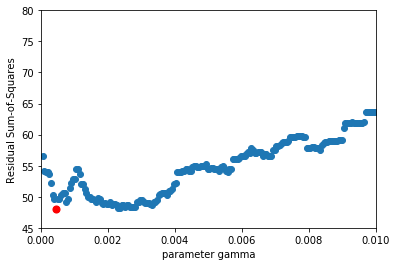

In [8]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('gamma when at min error:', gamma[error.index(min(error))])
plt.scatter(gamma, error)
plt.xlim((0.0000001, 0.01))
plt.ylim((min(error) - 3, 80))
plt.xlabel('parameter gamma')
plt.ylabel('Residual Sum-of-Squares')
plt.scatter(gamma[error.index(min(error))], min(error), c = 'r', s = 50)
plt.show()

### linear kernel

In [41]:
C = np.linspace(1, 50, 50)
error = []
for i in C:
    clf = svm.SVC(kernel = 'linear', C = i)
    error.append(cross_val(x, y, clf))

C: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
error: [56.8, 54.8, 56.2, 55.0, 56.8, 56.2, 56.2, 56.0, 56.0, 55.6, 56.2, 55.6, 55.6, 55.8, 57.4, 58.4, 57.6, 56.6, 57.6, 57.8, 58.6, 58.4, 59.6, 59.4, 58.8, 57.4, 55.8, 56.0, 58.4, 55.8, 54.0, 56.6, 56.8, 58.0, 57.6, 58.6, 58.6, 58.8, 58.2, 58.2, 57.8, 57.8, 58.0, 59.6, 58.0, 59.8, 60.4, 60.2, 62.0, 60.0]
min error with linear kernel: 54.0


min error: 54.0
gamma when at min error: 31.0


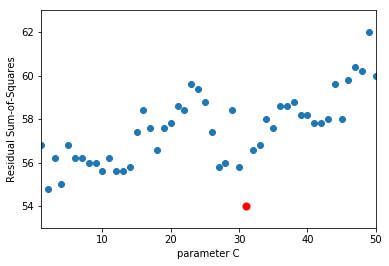

In [42]:
import matplotlib.pyplot as plt
import math
print('min error:', min(error))
print('gamma when at min error:', C[error.index(min(error))])
plt.scatter(C, error)
plt.xlim((1, 50))
plt.ylim((min(error) - 1, max(error) + 1))
plt.xlabel('parameter C')
plt.ylabel('Residual Sum-of-Squares')
plt.scatter(C[error.index(min(error))], min(error), c = 'r', s = 50)
plt.show()

### poly kernel

In [9]:
degree = np.linspace(0, 12, 13)
error = []
for i in degree:
    clf = svm.SVC(kernel = 'poly', C = 1e6, degree = i, gamma = 0.000001)
    error.append(cross_val(x, y, clf))
print('min error with poly kernel:', min(error))

min error with poly kernel: 61.0


min error: 61.0
gamma when at min error: 2.0


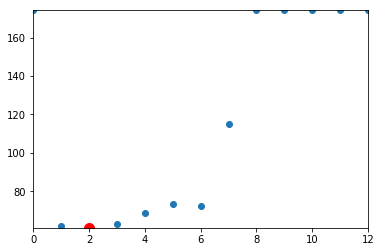

In [10]:
print('min error:', min(error))
print('gamma when at min error:', degree[error.index(min(error))])
plt.scatter(degree, error)
plt.xlim((0, 12))
plt.ylim((min(error), max(error)))
plt.scatter(degree[error.index(min(error))], min(error), c = 'r', s = 100)
plt.show()